In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

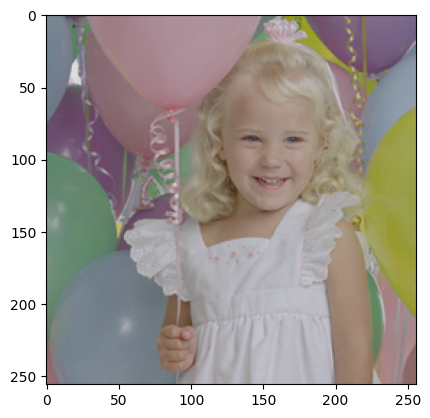

In [4]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像を表示
plt.imshow(image_rgb)

(256, 256, 3)
(256, 256)
(256, 256)
(256, 256)


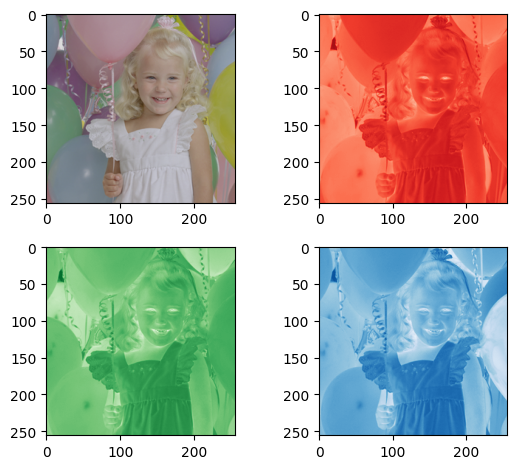

In [28]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image_rgb.shape)

# RGBチャネルの分離
r_channel, g_channel, b_channel = cv2.split(image_rgb)

print(r_channel.shape)
print(g_channel.shape)
print(b_channel.shape)

# 元画像と各チャネルの画像を表示
fig, axes = plt.subplots(2, 2, tight_layout=True)
axes[0, 0].imshow(image_rgb, vmin=0, vmax=255)
axes[0, 1].imshow(r_channel, cmap='Reds', vmin=0, vmax=255)
axes[1, 0].imshow(g_channel, cmap='Greens', vmin=0, vmax=255)
axes[1, 1].imshow(b_channel, cmap='Blues', vmin=0, vmax=255)

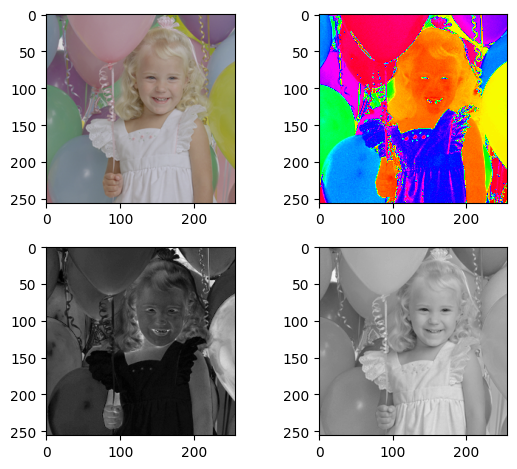

In [29]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# RGBからHSV色空間に変換
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# HSVチャネルの分離
h_channel, s_channel, v_channel = cv2.split(image_hsv)

# 元画像と各チャネルの画像を表示
fig, axes = plt.subplots(2, 2, tight_layout=True)
axes[0, 0].imshow(image_rgb)
axes[0, 1].imshow(h_channel, cmap='hsv')
axes[1, 0].imshow(s_channel, cmap='gray')
axes[1, 1].imshow(v_channel, cmap='gray')

In [30]:
# RGBからCMYKに変換する関数
def rgb_to_cmyk(image_rgb):

    # 各RGBチャネルを0-1に正規化
    image_rgb_normalized = image_rgb / 255.0
    
    # CMYの計算
    c = 1 - image_rgb_normalized[..., 0]
    m = 1 - image_rgb_normalized[..., 1]
    y = 1 - image_rgb_normalized[..., 2]
    
    # Kチャンネルの計算
    k = np.min([c, m, y], axis=0)
    
    # C, M, Yの値をKに基づいて調整
    c = c - k
    m = m - k
    y = y - k
    
		# 0-255の範囲に変換
    cmyk = np.zeros(image_rgb.shape[:2] + (4,), dtype=np.uint8) 
    cmyk[..., 0] = (c * 255).astype(np.uint8)
    cmyk[..., 1] = (m * 255).astype(np.uint8)
    cmyk[..., 2] = (y * 255).astype(np.uint8)
    cmyk[..., 3] = (k * 255).astype(np.uint8)
    
    return cmyk

In [31]:
# 各チャンネルの色を擬似的に再現して表示する
def display_color_channel(channel, color):
    # カラーマップ作成
    blank = np.zeros_like(channel)
    
    if color == 'cyan':
        return np.stack([blank, channel, channel], axis=-1) # シアンはRGB色空間では(0,255,255)
    elif color == 'magenta':
        return np.stack([channel, blank, channel], axis=-1) # マゼンタはRGB色空間では(255,0, 255)
    elif color == 'yellow':
        return np.stack([channel, channel, blank], axis=-1)  # イエローはRGB色空間では(255,255, 0)
    elif color == 'black':
        return np.stack([channel, channel, channel], axis=-1)

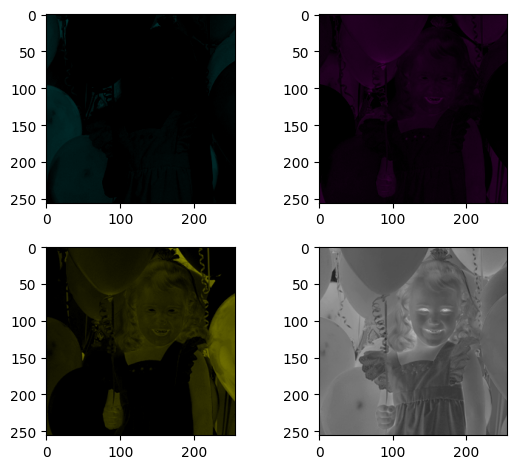

In [34]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# CMYK色空間に変換
image_cmyk = rgb_to_cmyk(image_rgb)

# CMYKチャネルの分離
c_channel, m_channel, y_channel, k_channel = cv2.split(image_cmyk)

# 元画像と各チャネルの画像を表示
fig, axes = plt.subplots(2, 2, tight_layout=True)
axes[0, 0].imshow(display_color_channel(c_channel, 'cyan'))
axes[0, 1].imshow(display_color_channel(m_channel, 'magenta'))
axes[1, 0].imshow(display_color_channel(y_channel, 'yellow'))
axes[1, 1].imshow(display_color_channel(k_channel, 'black'))

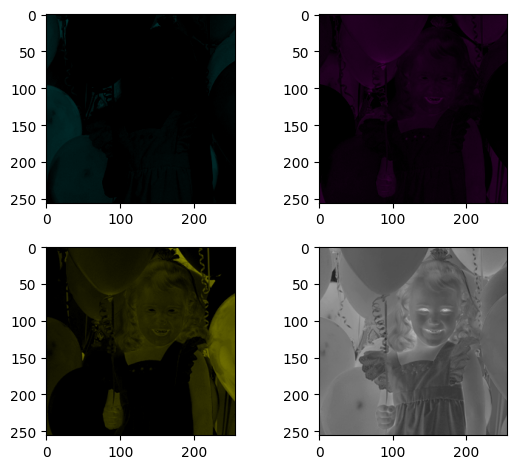

In [35]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# CMYK色空間に変換
image_cmyk = rgb_to_cmyk(image_rgb)

# CMYKチャネルの分離
c_channel, m_channel, y_channel, k_channel = cv2.split(image_cmyk)

# 元画像と各チャネルの画像を表示
fig, axes = plt.subplots(2, 2, tight_layout=True)
axes[0, 0].imshow(display_color_channel(c_channel, 'cyan'))
axes[0, 1].imshow(display_color_channel(m_channel, 'magenta'))
axes[1, 0].imshow(display_color_channel(y_channel, 'yellow'))
axes[1, 1].imshow(display_color_channel(k_channel, 'black'))

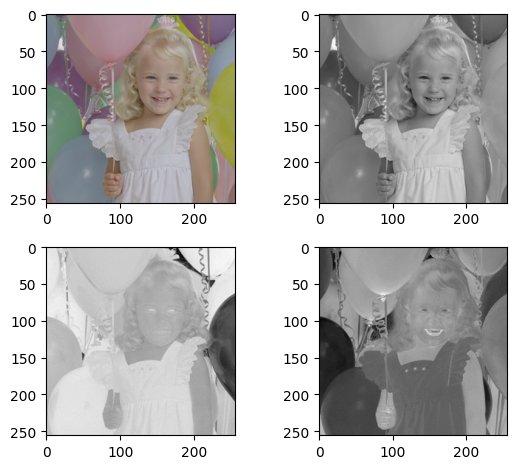

In [36]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# RGBからYUV色空間に変換
image_yuv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YUV)

# YUVチャネルの分離
y_channel, u_channel, v_channel = cv2.split(image_yuv)

# 元画像と各チャネルの画像を表示
fig, axes = plt.subplots(2, 2, tight_layout=True)
axes[0, 0].imshow(image_rgb)
axes[0, 1].imshow(y_channel, cmap='gray')
axes[1, 0].imshow(u_channel, cmap='gray')
axes[1, 1].imshow(v_channel, cmap='gray')

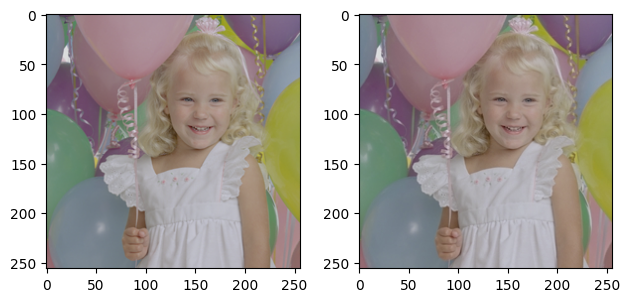

In [37]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# BGRからYUV色空間に変換
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# YUVチャネルの分離
y_channel, u_channel, v_channel = cv2.split(image_yuv)

# UとVチャネルを4:2:0サブサンプリング（縦横で1/2のサイズに縮小）
u_subsampled = cv2.resize(u_channel, (u_channel.shape[1] // 2, u_channel.shape[0] // 2), interpolation=cv2.INTER_LINEAR)
v_subsampled = cv2.resize(v_channel, (v_channel.shape[1] // 2, v_channel.shape[0] // 2), interpolation=cv2.INTER_LINEAR)

# サブサンプリングしたUとVを元のサイズにアップサンプリング
u_upsampled = cv2.resize(u_subsampled, (u_channel.shape[1], u_channel.shape[0]), interpolation=cv2.INTER_LINEAR)
v_upsampled = cv2.resize(v_subsampled, (v_channel.shape[1], v_channel.shape[0]), interpolation=cv2.INTER_LINEAR)

# 再構成したYUV画像の作成
image_yuv_compressed = cv2.merge([y_channel, u_upsampled, v_upsampled])

# YUVからRGB色空間に再変換
image_compressed_rgb = cv2.cvtColor(image_yuv_compressed, cv2.COLOR_YUV2RGB)

# 元画像と圧縮画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(image_compressed_rgb)

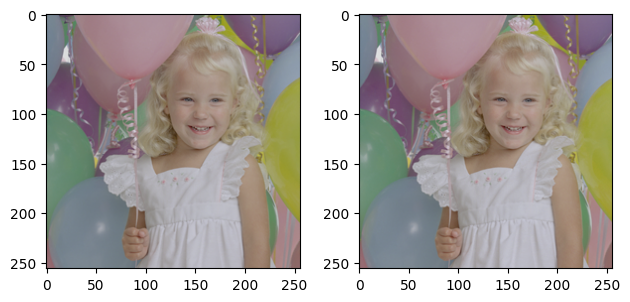

In [41]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# BGRからHSV色空間に変換
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSVチャネルの分離
h_channel, s_channel, v_channel = cv2.split(image_hsv)

# Vチャンネルに明るさを加える
brightness = 3  # 明るさを30上げる
v_channel = np.clip(v_channel + brightness, 0, 255)  # 値を0-255の範囲に制限

# 調整後のVチャネルを元にHSV画像を再構成
image_hsv_adjusted = cv2.merge([h_channel, s_channel, v_channel])

# HSVからRGB色空間に戻す
image_brightened_rgb = cv2.cvtColor(image_hsv_adjusted, cv2.COLOR_HSV2RGB)

# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(image_brightened_rgb)

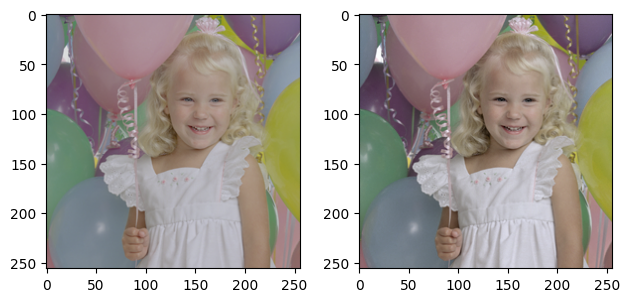

In [42]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# BGRからHSV色空間に変換
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSVチャネルの分離
h_channel, s_channel, v_channel = cv2.split(image_hsv)

# Vチャネルのピクセル値の平均を基準に、コントラストを調整
mean_v = np.mean(v_channel)
    
# V値をコントラスト値に基づいて調整する
contrast = 1.5  # 1.5倍のコントラスト
v_channel = np.clip(contrast * (v_channel - mean_v) + mean_v, 0, 255)
v_channel = v_channel.astype(np.uint8)

# 調整後のVチャネルを元にHSV画像を再構成
image_hsv_adjusted = cv2.merge([h_channel, s_channel, v_channel])

# HSVからRGB色空間に戻す
image_contrast_rgb = cv2.cvtColor(image_hsv_adjusted, cv2.COLOR_HSV2RGB)

# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(image_contrast_rgb)

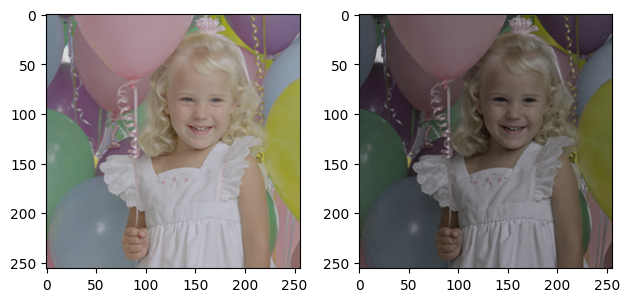

In [44]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# BGRからHSV色空間に変換
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSVチャネルの分離
h_channel, s_channel, v_channel = cv2.split(image_hsv)

# 正規化（0〜1の範囲にスケーリング）
v_channel_normalized = v_channel / 255.0
    
# ガンマ補正を適用
gamma = 0.5  # ガンマ値を2.0に設定（暗い部分を明るく）
v_channel_corrected = v_channel_normalized ** (1 / gamma)

# 0〜255の範囲に再スケーリングし、uint8に変換
v_channel = (v_channel_corrected * 255).astype(np.uint8)

# 調整後のVチャネルを元にHSV画像を再構成
image_hsv_adjusted = cv2.merge([h_channel, s_channel, v_channel])

# HSVからRGB色空間に戻す
image_gamma_rgb = cv2.cvtColor(image_hsv_adjusted, cv2.COLOR_HSV2RGB)

# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(image_gamma_rgb)